In [4]:
for d in os.listdir('kaggle-dsb-data/sample_images'):
    print("Patient '{}' has {} scans".format(d, len(os.listdir('kaggle-dsb-data/sample_images/' + d))))
print('----')
print('Total patients {} Total DCM files {}'.format(len(os.listdir('kaggle-dsb-data/sample_images')), 
                                                      len(glob.glob('kaggle-dsb-data/sample_images/*/*.dcm'))))

Patient '00cba091fa4ad62cc3200a657aeb957e' has 134 scans
Patient '0a099f2549429d29b32f349e95fb2244' has 128 scans
Patient '0a0c32c9e08cc2ea76a71649de56be6d' has 133 scans
Patient '0a38e7597ca26f9374f8ea2770ba870d' has 110 scans
Patient '0acbebb8d463b4b9ca88cf38431aac69' has 203 scans
Patient '0b20184e0cd497028bdd155d9fb42dc9' has 196 scans
Patient '0bd0e3056cbf23a1cb7f0f0b18446068' has 280 scans
Patient '0c0de3749d4fe175b7a5098b060982a1' has 123 scans
Patient '0c37613214faddf8701ca41e6d43f56e' has 164 scans
Patient '0c59313f52304e25d5a7dcf9877633b1' has 244 scans
Patient '0c60f4b87afcb3e2dfa65abbbf3ef2f9' has 136 scans
Patient '0c98fcb55e3f36d0c2b6507f62f4c5f1' has 180 scans
Patient '0c9d8314f9c69840e25febabb1229fa4' has 221 scans
Patient '0ca943d821204ceb089510f836a367fd' has 147 scans
Patient '0d06d764d3c07572074d468b4cff954f' has 435 scans
Patient '0d19f1c627df49eb223771c28548350e' has 183 scans
Patient '0d2fcf787026fece4e57be167d079383' has 126 scans
Patient '0d941a3ad6c889ac451caf

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
%matplotlib inline
p = sns.color_palette()

os.listdir('kaggle-dsb-data/sample_images')

['00cba091fa4ad62cc3200a657aeb957e',
 '0a099f2549429d29b32f349e95fb2244',
 '0a0c32c9e08cc2ea76a71649de56be6d',
 '0a38e7597ca26f9374f8ea2770ba870d',
 '0acbebb8d463b4b9ca88cf38431aac69',
 '0b20184e0cd497028bdd155d9fb42dc9',
 '0bd0e3056cbf23a1cb7f0f0b18446068',
 '0c0de3749d4fe175b7a5098b060982a1',
 '0c37613214faddf8701ca41e6d43f56e',
 '0c59313f52304e25d5a7dcf9877633b1',
 '0c60f4b87afcb3e2dfa65abbbf3ef2f9',
 '0c98fcb55e3f36d0c2b6507f62f4c5f1',
 '0c9d8314f9c69840e25febabb1229fa4',
 '0ca943d821204ceb089510f836a367fd',
 '0d06d764d3c07572074d468b4cff954f',
 '0d19f1c627df49eb223771c28548350e',
 '0d2fcf787026fece4e57be167d079383',
 '0d941a3ad6c889ac451caf89c46cb92a',
 '0ddeb08e9c97227853422bd71a2a695e',
 '0de72529c30fe642bc60dcb75c87f6bd']

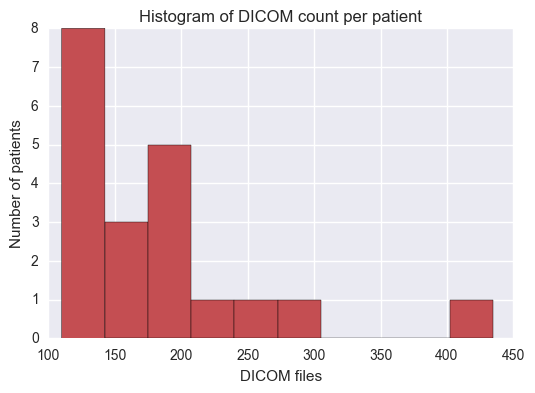

In [5]:
patient_sizes = [len(os.listdir('kaggle-dsb-data/sample_images/' + d)) for d in os.listdir('kaggle-dsb-data/sample_images')]
plt.hist(patient_sizes, color=p[2])
plt.ylabel('Number of patients')
plt.xlabel('DICOM files')
plt.title('Histogram of DICOM count per patient')

In [6]:
sizes = [os.path.getsize(dcm)/1000000 for dcm in glob.glob('kaggle-dsb-data/sample_images/*/*.dcm')]
print('DCM file sizes: min {:.3}MB max {:.3}MB avg {:.3}MB std {:.3}MB'.format(np.min(sizes), 
                                                       np.max(sizes), np.mean(sizes), np.std(sizes)))

DCM file sizes: min 0.525MB max 0.526MB avg 0.525MB std 3.74e-05MB


In [16]:
df_train = pd.read_csv('kaggle-dsb/kaggle-dsb-data/stage1_labels.csv')
df_train.head()

OSError: File b'kaggle-dsb/kaggle-dsb-data/stage1_labels.csv' does not exist

In [17]:
print('Number of training patients: {}'.format(len(df_train)))
print('Cancer rate: {:.4}%'.format(df_train.cancer.mean()*100))

NameError: name 'df_train' is not defined

In [ ]:
from sklearn.metrics import log_loss
logloss = log_loss(df_train.cancer, np.zeros_like(df_train.cancer) + df_train.cancer.mean())
print('Training logloss is {}'.format(logloss))

In [14]:
sample = pd.read_csv('../stage1_sample_submission.csv')
sample['cancer'] = df_train.cancer.mean()
sample.to_csv('naive_submission.csv', index=False)

OSError: File b'../stage1_sample_submission.csv' does not exist